In [40]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pipeline_v100
reload(pipeline_v100)

sns.set_palette("Set2")
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [82]:
x_s = np.linspace(0.1, 2, num=100)
n = 5
y_s = np.array([pipeline_v100.simulation(n=n, 
                                         a_x= 1, 
                                         h_z= x, 
                                         delta = 0.2,
                                         #m = 2**(n-1),
                                         m = 2,
                                         DEBUG=True) for x in x_s])

Fidelity F = (0.9562112856308568+0.00015517066127551706j)

Fidelity F = (0.9561052514168459-7.033045418298645e-05j)

Fidelity F = (0.9560464005464888+0.00010110037313073992j)

Fidelity F = (0.9560787151689694-5.1593493930786075e-05j)

Fidelity F = (0.955902811729172-0.00016477190750113617j)

Fidelity F = (0.9558875153396181-8.757721238539717e-05j)

Fidelity F = (0.9557966210713946+8.5620287419015e-05j)

Fidelity F = (0.9557785074997089+8.61562722820586e-05j)

Fidelity F = (0.9557557748916837-1.219730691503124e-05j)

Fidelity F = (0.955707614511827+7.69893933620096e-05j)

Fidelity F = (0.955718926078502+3.013551552972274e-05j)

Fidelity F = (0.9556656958677284+1.84360337555694e-05j)

Fidelity F = (0.9556842604612896+6.581377552148949e-05j)

Fidelity F = (0.9556505446589544+4.57700164414219e-05j)

Fidelity F = (0.9557262752488626+3.792549509455244e-05j)

Fidelity F = (0.9557717499028833-0.00020439097742721858j)

Fidelity F = (0.9558736784395493+6.527182335348198e-05j)

Fidelity F = (0.95

In [83]:
y_s[0]

{'fidelity_truncated': 0.5162236576077811,
 'fidelity_generalized': 0.5162236576077811,
 'lower_tqfi': 96.75526847844375,
 'upper_tqfi': 96.75526847844375,
 'true_fidelity': 0.9562112856308567846,
 'true_qfi': 8.75774287382864138,
 'sub_qfi_bound': 8.843668034874396,
 'super_qfi_bound': 4.64174855660675,
 'trace_rho': (1-5.901736761449204e-19j),
 'trace_rho_delta': (1.0000000000000002-5.9852238464373566e-18j),
 'purity_rho': (0.5807347125190185-3.7269449679189215e-20j),
 'purity_rho_delta': (0.5426422637868749+1.1655173354219173e-18j),
 'rank_rho': 2,
 'rank_rho_delta': 2}

In [84]:
# pipelines return debug info only if we are in DEBUG==True
purity_rho = np.array([np.real(x["purity_rho"]) for x in y_s ])
purity_rho_delta = np.array([np.real(x["purity_rho_delta"]) for x in y_s ])
lower_tqfi = np.array([np.real(x["lower_tqfi"]) for x in y_s ])
upper_tqfi = np.array([np.real(x["upper_tqfi"]) for x in y_s ])
true_qfi = np.array([np.real(x["true_qfi"]) for x in y_s ])
true_fidelity = np.array([np.real(x["true_fidelity"]) for x in y_s ])
fidelity_truncated = np.array([np.real(x["fidelity_truncated"]) for x in y_s ])
fidelity_generalized = np.array([np.real(x["fidelity_generalized"]) for x in y_s ])

sub_qfi_bound = np.array([np.real(x["sub_qfi_bound"]) for x in y_s ])
super_qfi_bound = np.array([np.real(x["super_qfi_bound"]) for x in y_s ])


error = np.max([np.imag(x["lower_tqfi"]) for x in y_s ])
print(error)

9.006852703594776e-15


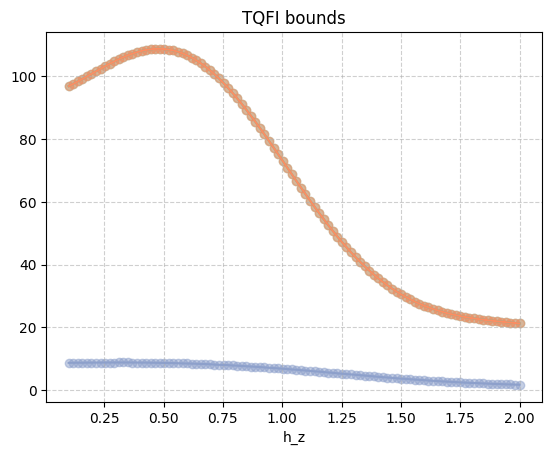

In [85]:
plt.scatter(x_s, lower_tqfi, alpha=0.5)
plt.plot(x_s, lower_tqfi)
plt.scatter(x_s, (upper_tqfi), alpha=0.5)
plt.plot(x_s, (upper_tqfi))
plt.scatter(x_s, (true_qfi), alpha=0.5)
plt.plot(x_s, (true_qfi))
plt.title("TQFI bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

In [86]:
print(f"max at h_z = {x_s[np.argmax(lower_tqfi)]}")

max at h_z = 0.48383838383838385


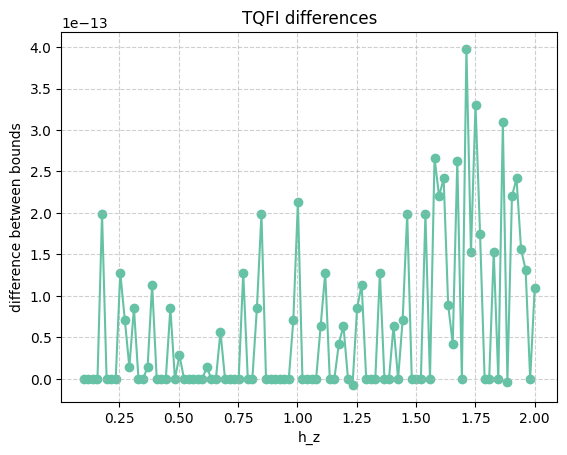

In [87]:
plt.scatter(x_s,upper_tqfi - lower_tqfi)
plt.plot(x_s,upper_tqfi - lower_tqfi)
plt.title("TQFI differences")
plt.ylabel("difference between bounds")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.xlabel("h_z")
plt.show()

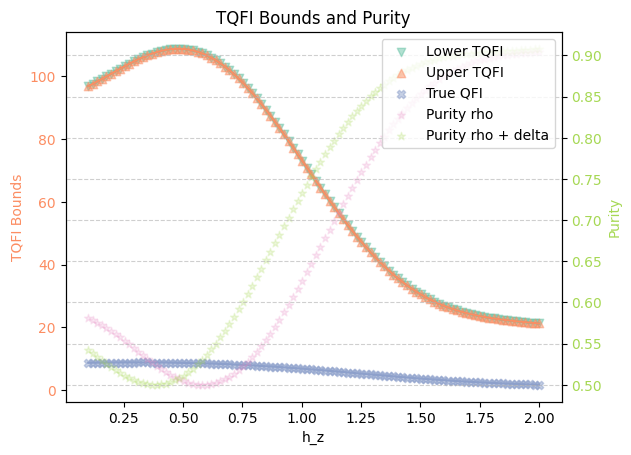

In [88]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, lower_tqfi, alpha=0.5, marker="v", label="Lower TQFI", color = palette[0])
ax1.plot(x_s, lower_tqfi)
ax1.scatter(x_s, upper_tqfi, marker="^", alpha=0.5, label="Upper TQFI", color =  palette[1])
ax1.plot(x_s, upper_tqfi)
ax1.scatter(x_s, true_qfi, marker= "X", alpha=0.5, label="True QFI", color = palette[2])
ax1.plot(x_s, true_qfi)

ax1.set_xlabel("h_z")
ax1.set_ylabel("TQFI Bounds", color= palette[1])
ax1.tick_params(axis='y', labelcolor= palette[1])

# Second y-axis
ax2 = ax1.twinx()
ax2.scatter(x_s, purity_rho, alpha=0.2, marker="*",label="Purity rho", 
            color= palette[3])
ax2.scatter(x_s, purity_rho_delta, alpha=0.2, marker="*", label="Purity rho + delta", color = palette[4])

ax2.set_ylabel("Purity", color=palette[4])
ax2.tick_params(axis='y', labelcolor=palette[4])

plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

# Legend
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

plt.title("TQFI Bounds and Purity")
plt.show()


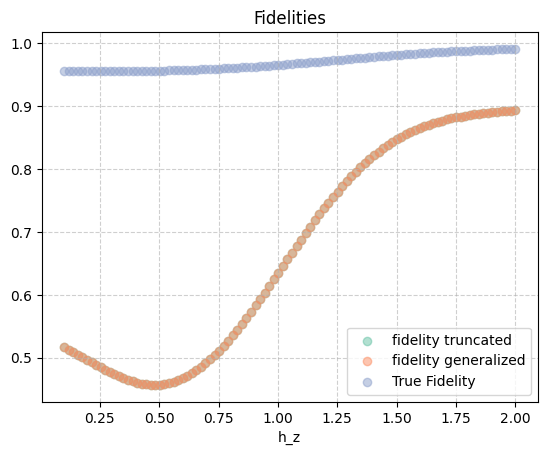

In [89]:
fig, ax1 = plt.subplots()

palette = sns.color_palette("Set2")

# First y-axis
ax1.scatter(x_s, fidelity_truncated, alpha=0.5, label="fidelity truncated", color =  palette[0])
ax1.scatter(x_s, fidelity_generalized, alpha=0.5, label="fidelity generalized", color =  palette[1])
ax1.scatter(x_s, true_fidelity, alpha=0.5, label="True Fidelity", color = palette[2])
ax1.set_xlabel("h_z")
ax1.legend()

plt.title("Fidelities")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability
plt.show()


In [90]:
np.min(true_fidelity)

0.95565054465895441643

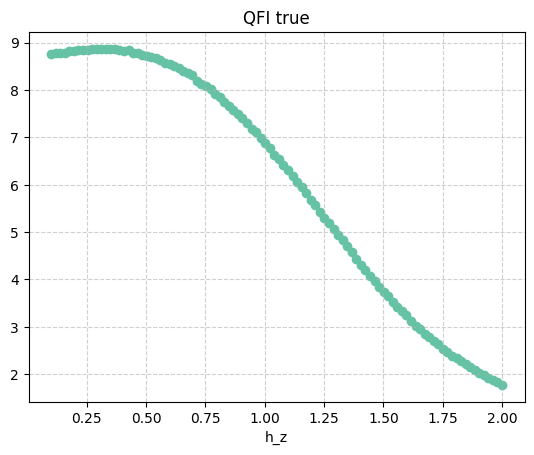

In [91]:
plt.scatter(x_s,true_qfi)
plt.plot(x_s,true_qfi)
plt.xlabel("h_z")
plt.title("QFI true")
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability


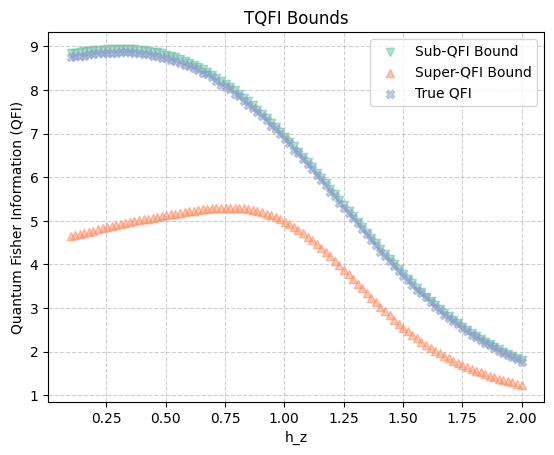

In [95]:
plt.scatter(x_s, sub_qfi_bound, marker = "v",alpha=0.5, label="Sub-QFI Bound", color=palette[0])
plt.scatter(x_s, super_qfi_bound,marker = "^", alpha=0.5, label="Super-QFI Bound", color=palette[1])
plt.scatter(x_s, true_qfi, marker = "X",alpha=0.5, label="True QFI", color=palette[2])
plt.plot(x_s, true_qfi, linestyle="dashed", color=palette[2], alpha=0.7)

plt.title("TQFI Bounds")
plt.xlabel("h_z")
plt.ylabel("Quantum Fisher Information (QFI)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

plt.show()


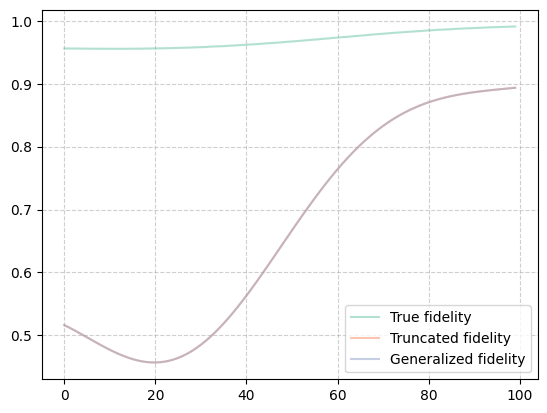

In [93]:
plt.plot(true_fidelity, label="True fidelity", alpha=0.5)
plt.plot(fidelity_truncated, label="Truncated fidelity", alpha=0.5)
plt.plot(fidelity_generalized, label="Generalized fidelity", alpha=0.5)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)  # Subtle grid for readability

In [94]:
super_qfi_bound >= true_qfi

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])